# Data Analysis

- Read the data files generated by the  [5 - Depth Caldulation OFD](http://localhost:8889/lab/tree/Google%20Drive/ScienceFair2021/Notebooks/5%20-%20Depth%20Calculation%20OFD%20Final-Copy1.ipynb) notebook
- combine the datapoints from the different files with the same rotational and translational speeds
- remove the rotational optical flow
- do descriptive statistics
- calculate distances


In [33]:
user = 'marcvanzyl'
user = 'gerrie'

In [34]:
import numpy as np
import cv2, os
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

# Now we can check

## Camera features:
- sensor size = 3.68 x 2.76 mm  
- sensor resolution  = 3280 × 2464
- focal length = 3.04 mm

$$ d_{mm} = \frac{pix \times 3.68}{3280} $$

The depth can now be found
$$ Z = \frac{T \times f}{d_{mm}} $$

In [35]:
import math
def deg_to_rad(deg):
    return deg/90*math.pi()

focal_length = 3.04

pix = math.sin(math.radians(1))*focal_length/3.68*3280
pix

47.288433442239494

In [36]:
# 5 deg/s
pix*5/21

11.259150819580832

In [37]:
math.radians(180)

3.141592653589793

# Load the list of files

In [38]:
datadir = "/Users/{}/Google Drive/ScienceFair2021/DataCapture/smooth/".format(user)


data_files = np.array([f for f in os.listdir(datadir) if f.endswith("res4.p") ])

# just sorts the files according to the number so we match picture 1_A with 1_C etc
#orderR = np.argsort([int((p.split('_')[-1]).split('.')[0]) for p in video_files])
#video_files = video_files[orderR]

data_files.sort()

In [39]:
data_files

array(['Smooth_15_-2_0_4623HF_res4.p', 'Smooth_15_-2_1_QV4WNZ_res4.p',
       'Smooth_15_-2_2_JB90U4_res4.p', 'Smooth_15_-2_3_MCDNNA_res4.p',
       'Smooth_15_-2_4_VIWO2O_res4.p', 'Smooth_15_-4_0_ESS22N_res4.p',
       'Smooth_15_-4_1_8GD6QO_res4.p', 'Smooth_15_-4_2_FMBNMX_res4.p',
       'Smooth_15_-4_3_EEUONU_res4.p', 'Smooth_15_-4_4_64CXH3_res4.p',
       'Smooth_15_-6_0_2HDNNZ_res4.p', 'Smooth_15_-6_1_D23FV7_res4.p',
       'Smooth_15_-6_2_U8BJY4_res4.p', 'Smooth_15_-6_3_GK86VH_res4.p',
       'Smooth_15_-6_4_JU8DFH_res4.p', 'Smooth_15_0_0_D26LA1_res4.p',
       'Smooth_15_0_1_OOBKBZ_res4.p', 'Smooth_15_0_2_MNBSLT_res4.p',
       'Smooth_15_0_3_VY12DF_res4.p', 'Smooth_15_0_4_46CIDO_res4.p',
       'Smooth_30_-2_0_07HKRJ_res4.p', 'Smooth_30_-2_1_UA678T_res4.p',
       'Smooth_30_-2_2_Z2CEPT_res4.p', 'Smooth_30_-2_3_DPNF63_res4.p',
       'Smooth_30_-2_4_O2G6SZ_res4.p', 'Smooth_30_-4_0_9WKFQF_res4.p',
       'Smooth_30_-4_1_B6QVWT_res4.p', 'Smooth_30_-4_2_9YG7KZ_res4.p',
       'Smo

In [40]:
data_files.shape

(80,)

In [41]:
import pickle

In [42]:
file = data_files[0]
df = pickle.load(open('{}{}'.format(datadir,file), 'rb'))

In [43]:
df

,AM0,AM1,AM2,AM3,AM4,AM5,AM6,AM7,AM8,AM9,...,OFC2,OFC3,OFC4,OFC5,OFZ0,OFZ1,OFZ2,OFZ3,OFZ4,OFZ5
106,NaN,"[286.25696, 1908.9678]","[1128.9631, 1880.0258]","[1902.2698, 1860.9519]","[2601.2837, 1842.252]",NaN,"[554.81195, 1095.1975]","[1176.3365, 1106.7556]","[1756.1533, 1119.3207]","[2300.88, 1137.3972]",...,"[865.5742, 1100.9766]","[1466.2449, 1113.0381]","[864.2749, 696.7268]","[1347.2543, 714.31586]",5.797572,5.186338,5.533994,5.135044,5.455476,5.094981
107,NaN,"[293.3115, 1907.9231]","[1134.7283, 1879.8186]","[1907.8519, 1861.378]","[2607.2827, 1842.9263]",NaN,"[560.5995, 1095.1584]","[1181.5, 1106.25]","[1761.2515, 1119.484]","[2306.151, 1137.7783]",...,"[871.04974, 1100.7042]","[1471.3757, 1112.867]","[869.68243, 696.87976]","[1352.3828, 714.41205]",5.855885,5.256128,5.556396,5.152934,5.465917,5.101484
108,NaN,"[300.5537, 1907.045]","[1140.5757, 1879.5581]","[1913.485, 1861.7708]","[2613.3555, 1843.7887]",NaN,"[567.4007, 1095.0989]","[1187.4268, 1106.9175]","[1766.7898, 1119.8088]","[2311.9355, 1138.2489]",...,"[877.4137, 1101.0082]","[1477.1083, 1113.3632]","[875.69104, 697.26624]","[1357.9524, 714.6546]",5.931193,5.338241,5.654296,5.254147,5.561548,5.201201
109,NaN,"[307.59656, 1906.1936]","[1146.4939, 1879.3438]","[1919.3334, 1862.2477]","[2619.6362, 1844.6125]",NaN,"[573.7234, 1095.1914]","[1193.1748, 1107.074]","[1772.508, 1120.1086]","[2317.8374, 1138.5719]",...,"[883.4491, 1101.1327]","[1482.8414, 1113.5913]","[881.74054, 697.4926]","[1363.4933, 714.9138]",6.021193,5.423039,5.717465,5.322690,5.643661,5.280964
110,NaN,"[314.74164, 1905.2203]","[1152.5073, 1879.0879]","[1925.0896, 1862.4941]","[2626.0312, 1845.5308]",NaN,"[580.245, 1095.0836]","[1198.9508, 1107.1036]","[1778.0354, 1120.2017]","[2323.6992, 1138.8706]",...,"[889.5979, 1101.0936]","[1488.4932, 1113.6526]","[887.89087, 697.69775]","[1369.2346, 715.0691]",6.089357,5.486790,5.801009,5.404781,5.727499,5.359516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,"[360.75, 1788.5]","[1100.0, 1846.25]","[1864.1642, 1894.7211]","[2673.6794, 1951.0461]",NaN,"[760.33264, 1075.4314]","[1319.3665, 1102.101]","[1896.5, 1128.5]","[2497.5476, 1158.6758]",NaN,...,"[1607.9332, 1115.3005]","[2197.024, 1143.5879]","[1594.1753, 724.68524]","[2062.5264, 737.74365]",5.654935,6.038359,5.577947,5.868390,5.491015,5.664109
242,"[366.7669, 1788.3772]","[1105.8933, 1846.3795]","[1869.7815, 1895.1835]","[2680.0122, 1953.4636]",NaN,"[766.2808, 1075.5585]","[1324.9071, 1102.1993]","[1902.25, 1129.0]","[2503.617, 1159.0057]",NaN,...,"[1613.5786, 1115.5996]","[2202.9336, 1144.0029]","[1599.9636, 724.63916]","[2067.125, 737.625]",5.679434,6.062413,5.608997,5.901007,5.542049,5.720124
243,"[373.0653, 1787.8257]","[1111.4482, 1846.0508]","[1875.2009, 1895.5839]","[2686.3274, 1954.343]",NaN,"[772.03, 1075.5344]","[1330.1869, 1102.2272]","[1907.2496, 1129.1368]","[2509.719, 1159.9807]",NaN,...,"[1618.7183, 1115.682]","[2208.4844, 1144.5588]","[1605.0587, 724.8563]","[2072.2131, 737.87476]",5.673445,6.069307,5.603761,5.898898,5.536369,5.713449
244,"[379.0224, 1787.4569]","[1115.458, 1846.1008]","[1880.215, 1896.1923]","[2692.0781, 1955.5078]",NaN,"[777.73065, 1075.5912]","[1335.3286, 1102.3519]","[1912.5691, 1129.3271]","[2514.9033, 1159.8605]",NaN,...,"[1623.9489, 1115.8396]","[2213.7363, 1144.5938]","[1610.052, 725.4706]","[2077.875, 738.625]",5.610875,6.013844,5.567215,5.869025,5.527303,5.702574


In [44]:
cons_df = pd.DataFrame(columns=['File','FrameNum', 'LinVel', 'RotVel','Run','AM0','AM1','AM2','AM3','AM4','AM5','AM6','AM7','AM8','AM9','AM10','AM11','AM12','AM13','AM14',
                                     'OFC0', 'OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5',
                                     'OFZ0','OFZ1','OFZ2','OFZ3','OFZ4','OFZ5' ])
for file in data_files:
    
    # get the features from the filename
    linear_vel = float(file.split('_')[1])
    rotational_vel = float(file.split('_')[2])
    run = int(file.split('_')[3])
    
    # old file format
    #temp = file.split('_')[2].split('-')
    #if temp[0] == '': # negative rotation
    #    rotational_vel = -1*float(temp[1])
    #    run = int(temp[2])
    #else:
    #    rotational_vel = float(temp[0])
    #    run = int(temp[1])
    
    print('{}: lin: {} rot: {} run:{}'.format(file, linear_vel, rotational_vel, run))
    
    df = pickle.load(open('{}{}'.format(datadir,file), 'rb'))
    
    df['File'] = file
    df['LinVel'] = linear_vel
    df['RotVel'] = rotational_vel
    df['Run'] = run
    df['FrameNum'] = df.index
    
    cons_df = cons_df.append(df, ignore_index=True)

Smooth_15_-2_0_4623HF_res4.p: lin: 15.0 rot: -2.0 run:0
Smooth_15_-2_1_QV4WNZ_res4.p: lin: 15.0 rot: -2.0 run:1
Smooth_15_-2_2_JB90U4_res4.p: lin: 15.0 rot: -2.0 run:2
Smooth_15_-2_3_MCDNNA_res4.p: lin: 15.0 rot: -2.0 run:3
Smooth_15_-2_4_VIWO2O_res4.p: lin: 15.0 rot: -2.0 run:4
Smooth_15_-4_0_ESS22N_res4.p: lin: 15.0 rot: -4.0 run:0
Smooth_15_-4_1_8GD6QO_res4.p: lin: 15.0 rot: -4.0 run:1
Smooth_15_-4_2_FMBNMX_res4.p: lin: 15.0 rot: -4.0 run:2
Smooth_15_-4_3_EEUONU_res4.p: lin: 15.0 rot: -4.0 run:3
Smooth_15_-4_4_64CXH3_res4.p: lin: 15.0 rot: -4.0 run:4
Smooth_15_-6_0_2HDNNZ_res4.p: lin: 15.0 rot: -6.0 run:0
Smooth_15_-6_1_D23FV7_res4.p: lin: 15.0 rot: -6.0 run:1
Smooth_15_-6_2_U8BJY4_res4.p: lin: 15.0 rot: -6.0 run:2
Smooth_15_-6_3_GK86VH_res4.p: lin: 15.0 rot: -6.0 run:3
Smooth_15_-6_4_JU8DFH_res4.p: lin: 15.0 rot: -6.0 run:4
Smooth_15_0_0_D26LA1_res4.p: lin: 15.0 rot: 0.0 run:0
Smooth_15_0_1_OOBKBZ_res4.p: lin: 15.0 rot: 0.0 run:1
Smooth_15_0_2_MNBSLT_res4.p: lin: 15.0 rot: 0.0 run:

In [45]:
cons_df.columns

Index(['File', 'FrameNum', 'LinVel', 'RotVel', 'Run', 'AM0', 'AM1', 'AM2',
       'AM3', 'AM4', 'AM5', 'AM6', 'AM7', 'AM8', 'AM9', 'AM10', 'AM11', 'AM12',
       'AM13', 'AM14', 'OFC0', 'OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFZ0',
       'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5'],
      dtype='object')

In [46]:
cons_df

,File,FrameNum,LinVel,RotVel,Run,AM0,AM1,AM2,AM3,AM4,...,OFC2,OFC3,OFC4,OFC5,OFZ0,OFZ1,OFZ2,OFZ3,OFZ4,OFZ5
0,Smooth_15_-2_0_4623HF_res4.p,106,15.0,-2.0,0,NaN,"[286.25696, 1908.9678]","[1128.9631, 1880.0258]","[1902.2698, 1860.9519]","[2601.2837, 1842.252]",...,"[865.5742, 1100.9766]","[1466.2449, 1113.0381]","[864.2749, 696.7268]","[1347.2543, 714.31586]",5.797572,5.186338,5.533994,5.135044,5.455476,5.094981
1,Smooth_15_-2_0_4623HF_res4.p,107,15.0,-2.0,0,NaN,"[293.3115, 1907.9231]","[1134.7283, 1879.8186]","[1907.8519, 1861.378]","[2607.2827, 1842.9263]",...,"[871.04974, 1100.7042]","[1471.3757, 1112.867]","[869.68243, 696.87976]","[1352.3828, 714.41205]",5.855885,5.256128,5.556396,5.152934,5.465917,5.101484
2,Smooth_15_-2_0_4623HF_res4.p,108,15.0,-2.0,0,NaN,"[300.5537, 1907.045]","[1140.5757, 1879.5581]","[1913.485, 1861.7708]","[2613.3555, 1843.7887]",...,"[877.4137, 1101.0082]","[1477.1083, 1113.3632]","[875.69104, 697.26624]","[1357.9524, 714.6546]",5.931193,5.338241,5.654296,5.254147,5.561548,5.201201
3,Smooth_15_-2_0_4623HF_res4.p,109,15.0,-2.0,0,NaN,"[307.59656, 1906.1936]","[1146.4939, 1879.3438]","[1919.3334, 1862.2477]","[2619.6362, 1844.6125]",...,"[883.4491, 1101.1327]","[1482.8414, 1113.5913]","[881.74054, 697.4926]","[1363.4933, 714.9138]",6.021193,5.423039,5.717465,5.322690,5.643661,5.280964
4,Smooth_15_-2_0_4623HF_res4.p,110,15.0,-2.0,0,NaN,"[314.74164, 1905.2203]","[1152.5073, 1879.0879]","[1925.0896, 1862.4941]","[2626.0312, 1845.5308]",...,"[889.5979, 1101.0936]","[1488.4932, 1113.6526]","[887.89087, 697.69775]","[1369.2346, 715.0691]",6.089357,5.486790,5.801009,5.404781,5.727499,5.359516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,Smooth_60_0_4_XV9Y0W_res4.p,110,60.0,0.0,4,NaN,"[811.2151, 1882.0792]","[1600.669, 1882.5343]","[2366.9927, 1889.9075]",NaN,...,"[1296.736, 1110.6753]","[1878.0032, 1127.5396]","[1260.781, 715.2742]","[1726.2852, 730.0299]",5.228762,5.055438,3.911168,3.812767,3.145988,3.081860
8846,Smooth_60_0_4_XV9Y0W_res4.p,111,60.0,0.0,4,NaN,"[816.6664, 1882.0234]","[1605.7902, 1882.4648]","[2371.934, 1890.0345]",NaN,...,"[1300.6454, 1110.7056]","[1881.718, 1127.7477]","[1263.7041, 715.07935]","[1729.4066, 730.01685]",5.221358,5.046725,3.897127,3.810365,3.140821,3.073000
8847,Smooth_60_0_4_XV9Y0W_res4.p,112,60.0,0.0,4,NaN,"[822.1056, 1881.9448]","[1610.9791, 1882.4111]","[2376.8955, 1890.0564]",NaN,...,"[1304.6143, 1110.7523]","[1885.5947, 1127.796]","[1267.0272, 715.3331]","[1732.5444, 730.083]",5.214473,5.042646,3.898650,3.805659,3.138330,3.074009
8848,Smooth_60_0_4_XV9Y0W_res4.p,113,60.0,0.0,4,NaN,"[827.4334, 1881.8738]","[1616.1742, 1882.3385]","[2381.9058, 1890.169]",NaN,...,"[1308.4457, 1110.7131]","[1889.2396, 1127.7466]","[1270.1765, 715.333]","[1735.6057, 730.06915]",5.206155,5.035182,3.892510,3.802697,3.134834,3.066309


In [47]:
lin_vels = cons_df['LinVel'].unique()
rot_vels = cons_df['RotVel'].unique()
rot_vels

array([-2., -4., -6.,  0.])

In [48]:
lin_vels

array([15., 30., 45., 60.])

## Camera features:
- sensor size = 3.68 x 2.76 mm  
- sensor resolution  = 3280 × 2464
- focal length = 3.04 mm

$$ d_{mm} = \frac{pix \times 3.68}{3280} $$

The depth can now be found
$$ Z = \frac{T \times f}{d_{mm}} $$

# Add x-position

In [49]:
sensor_size = (3.68, 2.76)
resolution = (3280, 2464)
frame_rate = 21
f = 3.04

mid_frame_x = resolution[0]/2



import re

In [50]:
rotational_coeff = 2.035 
#rotational_coeff = f*np.tan(1*np.pi/180)*resolution[0]/sensor_size[0]/frame_rate



In [59]:
rotational_coeff

OFZ0    2.035
OFZ1    2.039
OFZ2    2.143
OFZ3    2.148
OFZ4    2.200
OFZ5    2.195
dtype: float64

In [60]:
# add the x positions of the centers
def add_x_pos(res):
    for zone in res.columns[res.columns.str.contains('OFZ')]: 
        if re.match(r'OFZ[0-9]$', zone):
            print(zone)
            res['{}x'.format(zone)] = res['OFC{}'.format(zone[-1])].apply(lambda x: mid_frame_x-x[0])

    return res

In [61]:
cons_df = add_x_pos(cons_df)

OFZ0
OFZ1
OFZ2
OFZ3
OFZ4
OFZ5


# Calculate relative motion
## Calc Theta
Theta is calculated by looking at the angle to the center of ArdCo marker AM2

In [62]:
# add theta 

def add_theta(res):
    
    res['AM2x'] = res['AM2'].apply(lambda x: x[0]-mid_frame_x)
    
    res['Theta'] = np.arctan((-res['AM2x'])*sensor_size[0]/resolution[0]/focal_length)

    return res

In [63]:
cons_df = add_theta(cons_df)

<AxesSubplot:>

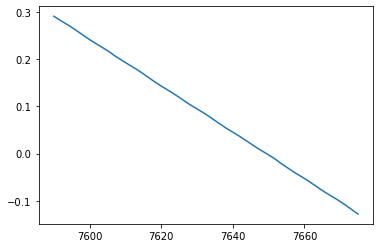

In [64]:
df = cons_df[cons_df['File']=='Smooth_60_-4_0_EVQ115_res4.p']
df['Theta'].plot()

In [65]:
def add_alpha(res):
    for zone in res.columns[res.columns.str.match(r'OFZ[0-9]x')]: 
        print(zone)
        
        res['Alpha{}'.format(zone[3])] = np.arctan((-res['OFZ{}x'.format(zone[3])])*sensor_size[0]/resolution[0]/focal_length)
        
    return res

In [66]:
cons_df = add_alpha(cons_df)

OFZ0x
OFZ1x
OFZ2x
OFZ3x
OFZ4x
OFZ5x


In [67]:
df = cons_df[cons_df['File']=='Smooth_60_-4_0_EVQ115_res4.p']

<AxesSubplot:>

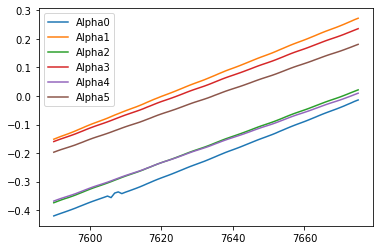

In [68]:
df[['Alpha0','Alpha1','Alpha2','Alpha3','Alpha4','Alpha5']].plot()

# Remove Rotational OF

Using vector rotation: 


<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Euler_AxisAngle.png" width=300 height=300 />
<center>Image Source: Wikipedia</center>



$$ \frac{\partial \rho}{\partial t} + \nabla \cdot \vec{j} = 0 \,. \label{eq:continuity} $$

$$ OF_{mm} = \frac{rotvel\cdot f}{\cos^2(\alpha)} $$

$$ OF_{pix} = \frac{rotvel\cdot f\cdot resolution}{\cos^2(\alpha)\cdot sensor size} $$



In [73]:
# maps degree/s to pix per frame
rotational_coeff = 2.035 #f*np.tan(1*np.pi/180)*resolution[0]/sensor_size[0]/frame_rate

rotational_coeff = pd.Series([2.049529, 2.051370,2.160106,2.158514,2.221120,2.215871],
                            index=['OFZ0', 'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5'])
rotational_coeff = pd.Series([2.035, 2.039, 2.143,2.148,2.2,2.195],
                            index=['OFZ0', 'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5'])

def remove_rotation(res,):
    
    for zone in res.columns[res.columns.str.match(r'OFZ[0-9]$')]: 
        print(zone)
        
        res['OFZLinear{}'.format(zone[3])] =  (res[zone] + res['RotVel']*rotational_coeff[zone]
                                              /(np.power(np.cos(res['Alpha{}'.format(zone[3])]),2)))
                                                                 
    return res

In [74]:
cons_df['OFZ1']

0       5.186338
1       5.256128
2       5.338241
3       5.423039
4       5.486790
          ...   
8845    5.055438
8846    5.046725
8847    5.042646
8848    5.035182
8849    5.036179
Name: OFZ1, Length: 8850, dtype: float64

In [75]:
cons_df = remove_rotation(cons_df)

OFZ0
OFZ1
OFZ2
OFZ3
OFZ4
OFZ5


In [76]:
cons_df[cons_df['RotVel']==-4][['OFZ0','OFZLinear0','OFZ1','OFZLinear1']]

,OFZ0,OFZLinear0,OFZ1,OFZLinear1
700,11.498561,1.533375,9.582285,1.164540
701,11.339293,1.405444,9.473541,1.066454
702,11.196996,1.295801,9.381478,0.985634
703,11.135568,1.266631,9.340244,0.954706
704,11.284818,1.446275,9.479457,1.104279
...,...,...,...,...
8015,12.957951,4.805845,13.883791,5.205756
8016,12.924088,4.775011,13.896184,5.194522
8017,12.976637,4.830181,13.986254,5.261196
8018,13.227930,5.083726,14.289083,5.538597


In [77]:
cons_df.groupby(['LinVel','RotVel' ]).mean()[['OFZ0','OFZLinear0','OFZ1','OFZLinear1']]

OFZ0  OFZLinear0       OFZ1  OFZLinear1
LinVel RotVel                                              
15.0   -6.0    14.416929    1.351351  13.827642    1.364170
       -4.0     9.632175    0.973989   9.339357    0.950206
       -2.0     5.687740    1.382893   5.477708    1.352419
        0.0     1.294137    1.294137   1.278428    1.278428
30.0   -6.0    15.803517    2.685654  15.141332    2.644121
       -4.0    11.485488    2.719068  11.065686    2.669254
       -2.0     7.015150    2.681843   6.728030    2.594196
        0.0     2.637842    2.637842   2.538301    2.538301
45.0   -6.0    17.205169    4.061639  16.519287    3.975837
       -4.0    12.881799    4.079206  12.359402    3.961230
       -2.0     8.313563    3.983384   7.990447    3.854585
        0.0     3.961281    3.961281   3.811847    3.811847
60.0   -6.0    18.613221    5.407446  17.842387    5.258983
       -4.0    14.052186    5.343327  13.500789    5.188426
       -2.0     9.586365    5.270417   9.212867    5.092048
        0.0     5.277249    5.277249   5.079087    5.079087

# Calculate Distance to Object

In [78]:

def calculate_distance(res):
    
    for zone in res.columns[res.columns.str.match(r'OFZLinear[0-9]$')]: 
        print(zone)
        
        res['OFZDist{}'.format(zone[9])] =  (
              res['LinVel']*np.cos(res['Theta']+res['Alpha{}'.format(zone[9])])*focal_length
            /(np.power(np.cos(res['Alpha{}'.format(zone[9])]),2) * frame_rate * res[zone] *sensor_size[0]/resolution[0])
            
        )
        
                                                                 
    return res

In [79]:
cons_df = calculate_distance(cons_df)

OFZLinear0
OFZLinear1
OFZLinear2
OFZLinear3
OFZLinear4
OFZLinear5


In [81]:
cons_df.groupby(['LinVel','RotVel' ]).mean()[['OFZ0','OFZLinear0','OFZ1','OFZLinear1','OFZDist0','OFZDist1','OFZDist2','OFZDist3','OFZDist4','OFZDist5']]

OFZ0  OFZLinear0       OFZ1  OFZLinear1     OFZDist0  \
LinVel RotVel                                                              
15.0   -6.0    14.416929    1.351351  13.827642    1.364170  1597.261237   
       -4.0     9.632175    0.973989   9.339357    0.950206  1493.238613   
       -2.0     5.687740    1.382893   5.477708    1.352419  1534.062790   
        0.0     1.294137    1.294137   1.278428    1.278428  1534.426509   
30.0   -6.0    15.803517    2.685654  15.141332    2.644121  1553.407466   
       -4.0    11.485488    2.719068  11.065686    2.669254  1532.814928   
       -2.0     7.015150    2.681843   6.728030    2.594196  1533.575783   
        0.0     2.637842    2.637842   2.538301    2.538301  1534.591567   
45.0   -6.0    17.205169    4.061639  16.519287    3.975837  1533.506400   
       -4.0    12.881799    4.079206  12.359402    3.961230  1532.792057   
       -2.0     8.313563    3.983384   7.990447    3.854585  1541.011663   
        0.0     3.961281    3.961281   3.811847    3.811847  1533.954408   
60.0   -6.0    18.613221    5.407446  17.842387    5.258983  1538.757557   
       -4.0    14.052186    5.343327  13.500789    5.188426  1538.470306   
       -2.0     9.586365    5.270417   9.212867    5.092048  1544.843442   
        0.0     5.277249    5.277249   5.079087    5.079087  1533.448987   

                  OFZDist1     OFZDist2     OFZDist3     OFZDist4     OFZDist5  
LinVel RotVel                                                                   
15.0   -6.0    1511.999708  2129.080192  2087.252311  2681.450396  2507.619070  
       -4.0    1420.899908  1967.207311  1919.054084  2469.367581  2326.585971  
       -2.0    1500.619267  2051.248653  2018.981043  2582.112781  2508.035882  
        0.0    1513.494047  2027.429872  2006.876947  2523.968826  2499.701750  
30.0   -6.0    1502.754930  2046.223930  2020.344195  2544.370845  2480.937873  
       -4.0    1495.452244  2016.231532  1997.032350  2505.751206  2440.998196  
       -2.0    1509.473460  2027.326799  2007.996211  2522.863617  2481.474145  
        0.0    1516.445014  2027.635387  2007.588297  2519.666707  2498.321389  
45.0   -6.0    1493.627153  2018.079950  1999.380516  2510.427134  2481.701099  
       -4.0    1503.350675  2021.863797  2010.921573  2517.492270  2477.116550  
       -2.0    1519.055442  2037.608957  2020.063782  2535.698372  2503.347693  
        0.0    1516.178560  2025.285459  2007.131135  2515.547467  2494.778166  
60.0   -6.0    1506.046559  2032.676941  2017.112563  2566.317973  2541.889187  
       -4.0    1509.931197  2028.436745  2025.818887  2531.673477  2522.707379  
       -2.0    1524.073440  2044.352047  2028.372550  2542.589865  2516.398725  
        0.0    1516.987767  2025.703268  2008.376895  2515.951247  2497.512679

In [14]:
# Actual distances
actual_dist = pd.Series([1525,1515,2015,2000,2505,2485], index=['OFZ0','OFZ1','OFZ2','OFZ3','OFZ4','OFZ5'], name='Actual Distance [mm]')
actual_dist_linear = pd.Series([1525,1515,2015,2000,2505,2485], index=['OFZLinear0','OFZLinear1','OFZLinear2','OFZLinear3','OFZLinear4','OFZLinear5'], name='Actual Distance [mm]')

In [15]:
actual_df = pd.DataFrame(actual_dist)
actual_df.index.name = 'Zone'
actual_df

,Actual Distance [mm]
Zone,
OFZ0,1550
OFZ1,1560
OFZ2,2020
OFZ3,2030
OFZ4,2575
OFZ5,2580


## Camera features:
- sensor size = 3.68 x 2.76 mm  
- sensor resolution  = 3280 × 2464
- focal length = 3.04 mm

$$ d_{mm} = \frac{pix \times 3.68}{3280} $$

The depth can now be found
$$ Z = \frac{T \times f}{d_{mm}} $$

In [16]:
def calc_camera_translation(v, frame_rate):
    return v/frame_rate

def calc_depth(pix, step):
    
    sensor_x = 3.68
    f = 3.1 #3.04
    sensor_x_res = 3280
    
    d_mm = pix*sensor_x/sensor_x_res
    
    return step*f/d_mm

In [17]:
calc_depth(5., calc_camera_translation(60, 21))

1578.8819875776396

In [18]:
calc_depth(3., calc_camera_translation(60, 21))

2631.469979296066

# Create all the data tables

# New version that uses only frames when around the camera facing sideways


In [19]:
frame_x = 3264
mid_frame_x = 3264/2

In [20]:
result_dict = {}

for lin_vel in lin_vels:
    for rot_vel in rot_vels:
        arrays = [['n','Raw Flow','Linear Flow', 'Distance', 'Actual Dist', 'Frame Error', 'Frame StdDev','Rolling Window Error', 'Rolling Window Error %','Rolling Window Error StdDev' ], ['','[pix/frame]','[pix/frame]', '[mm]', '[mm]', '[mm]', '[mm]', '[mm]', '[%]','[mm]' ]]
        full_result_df = pd.DataFrame(columns=pd.MultiIndex.from_arrays(arrays, names=('', 'Zone')))

        temp_df = cons_df[(cons_df['LinVel']== lin_vel) & (cons_df['RotVel']==rot_vel)].copy()
        
        
        of_lin = temp_df[['OFZLinear0','OFZLinear1', 'OFZLinear2', 'OFZLinear3', 'OFZLinear4', 'OFZLinear5']].copy()
        of_raw = temp_df[['OFZ0','OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5']].copy()

        col_names =['OFZ0', 'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5']   
        
        # change the column names
        of_lin.columns = col_names
        of_raw.columns = col_names

        
        means = of_lin.mean()
        stds = of_lin.std()
        
        num_std_dev =1.0

        for col in of_lin.columns:
            of_lin.loc[:,col] = of_lin[col].apply(lambda x: x if ((x>means[col]-num_std_dev*stds[col]) and (x<means[col]+num_std_dev*stds[col])) else np.nan).copy()


        depth_res = calc_depth(of_lin, calc_camera_translation(lin_vel, camera_fps))


        full_result_df[('n','')] = (of_lin.count())
        full_result_df['Raw Flow'] = of_raw.mean().round(3)
        full_result_df['Linear Flow'] = of_lin.mean().round(3)
        # do the data clean up here on Linear Flow
        
        
        full_result_df[('Distance','[mm]')] = calc_depth(of_lin.mean(), calc_camera_translation(lin_vel, camera_fps)).round(1)
        full_result_df[('Frame StdDev','[mm]')] = (full_result_df[('Distance','[mm]')]*(of_lin).std()/(of_lin).mean()).round(1)
        full_result_df[('Actual Dist','[mm]')] = actual_dist
        full_result_df[('Frame Error','[mm]')] = full_result_df[('Distance','[mm]')] - actual_dist
        #full_result_df[('Error %','[%]')] = (full_result_df[('Error','[mm]')]/actual_dist*100).round(2)
        
        print()
        print('Linear velocity: {}mm/s  Rotational velocity: {}deg/s'.format(lin_vel, rot_vel))
        # calc the averaging
        
        files = temp_df['File'].unique()
        
        summay_stats = pd.DataFrame(columns=['OFZ0', 'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5'])


        
        for file in files:
            # grab the file
            full_file_df = temp_df[temp_df['File']==file].copy()
            
            num_frames = full_file_df.shape[0]
            if rot_vel != 0.0:
                
                # extract the x pos of Aruco marker 2 to determine the rotation of the camera
                full_file_df['AM2x'] = full_file_df['AM2'].apply(lambda x: x[0]-mid_frame_x)


                mid_frame = full_file_df[full_file_df['AM2x']>0]['FrameNum'].iloc[0]
                max_frame = full_file_df['FrameNum'].max()
                side_frames = max_frame - mid_frame
            else:
                min_frame = full_file_df['FrameNum'].min()
                max_frame = full_file_df['FrameNum'].max()
                mid_frame = int((min_frame+max_frame)/2)
                side_frames = max_frame-mid_frame
                
            #print('mid_frame: {} side_frames {}'.format(mid_frame, side_frames))
            
            #extract the mid frames
            full_file_df = full_file_df[(full_file_df['FrameNum']>(mid_frame-side_frames)) & 
                                       (full_file_df['FrameNum']<(mid_frame+side_frames-10))]

            file_df = full_file_df[['OFZLinear0','OFZLinear1', 'OFZLinear2', 'OFZLinear3', 'OFZLinear4', 'OFZLinear5']].copy()
            file_df.columns = col_names
            
            # clean the outliers:

            means = file_df.mean()
            stds = file_df.std()

            num_std_dev = 2.0

            for col in file_df.columns:
                file_df.loc[:,col] = file_df[col].apply(lambda x: 
                                                        x if ((x>means[col]-num_std_dev*stds[col]) 
                                                              and (x<means[col]+num_std_dev*stds[col])) 
                                                        else np.nan).copy()

            rolling_measure = file_df.rolling(21, min_periods=10).mean()

            
            
            rolling_dist = calc_depth((rolling_measure), calc_camera_translation(lin_vel, camera_fps)).round(1)
            # calc distance and clean up noise
            rolling_error = rolling_dist.dropna()-actual_dist

            #rolling_error[rolling_error > 600] = np.nan
            #rolling_error[rolling_error < -600] = np.nan
            
            
            summay_stats = summay_stats.append(rolling_error, ignore_index=True)

        full_result_df[('Rolling Window Error','[mm]')] = summay_stats.mean().round(2)
        full_result_df[('Rolling Window Error %','[%]')] = (full_result_df[('Rolling Window Error','[mm]')]/actual_dist*100).round(2)
        full_result_df[('Rolling Window Error StdDev','[mm]')] = summay_stats.std().round(2)

        result_dict['{}_{}'.format(lin_vel,rot_vel)] = full_result_df
        
        display(full_result_df)
        
pickle.dump(result_dict, open('{}full_analysis_results.p'.format(datadir), 'wb'))


Linear velocity: 15.0mm/s  Rotational velocity: -2.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,1347,5.861,1.333,1480.8,1550,-69.2,402.3,9.88,0.64,99.41
OFZ1,1400,5.569,1.279,1543.6,1560,-16.4,422.4,0.46,0.03,110.26
OFZ2,1370,5.650,1.034,1908.7,2020,-111.3,687.0,-19.72,-0.98,159.37
OFZ3,1389,5.458,0.998,1978.2,2030,-51.8,714.8,-26.64,-1.31,167.55
OFZ4,1360,5.581,0.855,2307.5,2575,-267.5,1020.3,-152.01,-5.90,239.53
OFZ5,1383,5.378,0.836,2360.3,2580,-219.7,1038.8,-155.25,-6.02,240.69



Linear velocity: 15.0mm/s  Rotational velocity: -4.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,375,10.170,1.398,1412.2,1550,-137.8,430.7,43.86,2.83,107.43
OFZ1,366,9.694,1.361,1450.1,1560,-109.9,430.0,-2.18,-0.14,125.76
OFZ2,368,10.134,1.080,1827.7,2020,-192.3,731.1,133.54,6.61,196.52
OFZ3,367,9.807,1.045,1889.1,2030,-140.9,762.9,45.32,2.23,194.96
OFZ4,365,10.209,0.890,2217.8,2575,-357.2,1106.1,126.13,4.90,317.10
OFZ5,369,9.845,0.879,2246.5,2580,-333.5,1100.5,33.07,1.28,308.27



Linear velocity: 15.0mm/s  Rotational velocity: -6.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,211,14.757,1.533,1287.6,1550,-262.4,427.6,-135.12,-8.72,120.64
OFZ1,217,13.877,1.495,1320.2,1560,-239.8,434.4,-191.17,-12.25,116.73
OFZ2,219,14.847,1.216,1623.5,2020,-396.5,709.9,-128.21,-6.35,264.57
OFZ3,224,14.214,1.175,1679.0,2030,-351.0,754.3,-242.16,-11.93,237.56
OFZ4,223,15.058,1.044,1891.1,2575,-683.9,1017.1,-226.10,-8.78,398.10
OFZ5,220,14.395,1.021,1932.9,2580,-647.1,996.2,-335.24,-12.99,369.11



Linear velocity: 15.0mm/s  Rotational velocity: 0.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,1937,1.292,1.294,1525.6,1550,-24.4,32.5,-25.79,-1.66,7.55
OFZ1,1973,1.276,1.277,1545.9,1560,-14.1,32.5,-14.67,-0.94,7.42
OFZ2,1876,0.968,0.970,2034.3,2020,14.3,42.5,13.25,0.66,10.42
OFZ3,1861,0.962,0.963,2048.5,2030,18.5,46.0,17.52,0.86,11.35
OFZ4,1934,0.779,0.779,2535.1,2575,-39.9,52.9,-41.00,-1.59,15.42
OFZ5,1956,0.773,0.773,2551.8,2580,-28.2,44.8,-28.15,-1.09,13.88



Linear velocity: 30.0mm/s  Rotational velocity: -2.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,612,7.145,2.674,1476.2,1550,-73.8,137.0,2.76,0.18,46.67
OFZ1,578,6.772,2.560,1541.8,1560,-18.2,139.4,6.78,0.43,56.08
OFZ2,583,6.585,2.047,1928.2,2020,-91.8,231.6,27.67,1.37,74.83
OFZ3,581,6.341,1.968,2006.0,2030,-24.0,251.3,26.28,1.29,85.77
OFZ4,577,6.316,1.667,2367.2,2575,-207.8,356.0,-61.41,-2.38,118.78
OFZ5,580,6.078,1.630,2422.0,2580,-158.0,367.0,-47.68,-1.85,125.88



Linear velocity: 30.0mm/s  Rotational velocity: -4.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,414,11.656,2.781,1419.1,1550,-130.9,230.6,-20.62,-1.33,84.50
OFZ1,386,11.036,2.667,1479.9,1560,-80.1,230.0,-34.87,-2.24,59.73
OFZ2,388,11.239,2.072,1905.1,2020,-114.9,412.1,24.40,1.21,122.82
OFZ3,386,10.818,2.046,1928.9,2030,-101.1,410.5,-11.59,-0.57,97.22
OFZ4,377,11.106,1.693,2331.2,2575,-243.8,626.3,-29.91,-1.16,195.22
OFZ5,377,10.670,1.663,2373.1,2580,-206.9,626.5,-57.87,-2.24,152.56



Linear velocity: 30.0mm/s  Rotational velocity: -6.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,245,16.019,2.733,1444.5,1550,-105.5,296.8,14.75,0.95,43.16
OFZ1,227,15.071,2.600,1518.3,1560,-41.7,305.5,-2.95,-0.19,47.59
OFZ2,238,15.761,2.084,1893.7,2020,-126.3,528.3,87.11,4.31,78.35
OFZ3,240,15.088,1.985,1988.5,2030,-41.5,583.0,30.08,1.48,76.88
OFZ4,236,15.777,1.674,2358.1,2575,-216.9,844.3,32.28,1.25,127.09
OFZ5,236,15.086,1.666,2368.9,2580,-211.1,821.5,-3.35,-0.13,121.63



Linear velocity: 30.0mm/s  Rotational velocity: 0.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,800,2.646,2.648,1490.8,1550,-59.2,14.3,-60.21,-3.88,9.09
OFZ1,794,2.544,2.543,1552.0,1560,-8.0,14.8,-8.58,-0.55,6.11
OFZ2,740,1.969,1.968,2006.0,2020,-14.0,15.8,-15.66,-0.78,12.43
OFZ3,721,1.917,1.915,2060.9,2030,30.9,19.3,28.63,1.41,10.46
OFZ4,775,1.590,1.591,2481.1,2575,-93.9,28.9,-94.32,-3.66,17.55
OFZ5,726,1.552,1.553,2542.1,2580,-37.9,30.2,-37.27,-1.44,15.67



Linear velocity: 45.0mm/s  Rotational velocity: -2.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,375,8.419,3.998,1480.9,1550,-69.1,100.2,-25.04,-1.62,65.38
OFZ1,360,7.988,3.806,1555.5,1560,-4.5,100.6,-15.33,-0.98,52.72
OFZ2,360,7.521,3.034,1951.3,2020,-68.7,176.6,-9.94,-0.49,110.42
OFZ3,340,7.252,2.913,2032.4,2030,2.4,175.3,-4.19,-0.21,100.59
OFZ4,362,7.060,2.482,2385.3,2575,-189.7,270.3,-107.37,-4.17,172.30
OFZ5,343,6.806,2.409,2457.6,2580,-122.4,262.4,-88.96,-3.45,158.03



Linear velocity: 45.0mm/s  Rotational velocity: -4.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,384,13.059,4.067,1455.9,1550,-94.1,173.9,-24.32,-1.57,49.13
OFZ1,363,12.305,3.854,1536.1,1560,-23.9,170.0,-34.28,-2.20,49.21
OFZ2,364,12.260,3.003,1971.8,2020,-48.2,304.8,9.46,0.47,86.73
OFZ3,358,11.757,2.944,2011.1,2030,-18.9,296.6,-11.52,-0.57,77.49
OFZ4,354,11.917,2.431,2435.9,2575,-139.1,467.5,-56.37,-2.19,139.46
OFZ5,353,11.424,2.388,2479.0,2580,-101.0,454.9,-67.78,-2.63,119.06



Linear velocity: 45.0mm/s  Rotational velocity: -6.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,248,17.439,4.110,1440.7,1550,-109.3,205.3,2.30,0.15,35.45
OFZ1,234,16.428,3.908,1515.0,1560,-45.0,213.2,3.71,0.24,46.81
OFZ2,245,16.814,3.059,1935.4,2020,-84.6,393.2,85.35,4.23,64.78
OFZ3,230,16.112,3.011,1966.1,2030,-63.9,374.5,58.72,2.89,76.58
OFZ4,236,16.621,2.490,2378.2,2575,-196.8,584.3,54.92,2.13,100.48
OFZ5,233,15.913,2.447,2420.1,2580,-159.9,584.7,46.77,1.81,116.79



Linear velocity: 45.0mm/s  Rotational velocity: 0.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,429,3.967,3.966,1492.8,1550,-57.2,9.8,-59.64,-3.85,7.91
OFZ1,445,3.814,3.813,1552.8,1560,-7.2,8.5,-8.33,-0.53,4.39
OFZ2,450,2.955,2.953,2004.8,2020,-15.2,13.6,-17.58,-0.87,10.89
OFZ3,466,2.878,2.876,2058.4,2030,28.4,12.4,26.29,1.30,6.48
OFZ4,440,2.377,2.374,2493.7,2575,-81.3,17.9,-86.17,-3.35,15.91
OFZ5,452,2.322,2.322,2550.0,2580,-30.0,18.2,-31.57,-1.22,11.75



Linear velocity: 60.0mm/s  Rotational velocity: -2.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,280,9.705,5.285,1493.7,1550,-56.3,75.3,52.75,3.40,14.18
OFZ1,245,9.206,5.058,1560.6,1560,0.6,69.6,65.43,4.19,15.72
OFZ2,273,8.458,3.966,1990.4,2020,-29.6,129.7,144.58,7.16,26.75
OFZ3,259,8.161,3.843,2054.4,2030,24.4,128.8,151.71,7.47,28.18
OFZ4,268,7.808,3.227,2446.5,2575,-128.5,196.6,134.22,5.21,42.31
OFZ5,262,7.532,3.143,2511.8,2580,-68.2,199.0,154.86,6.00,45.13



Linear velocity: 60.0mm/s  Rotational velocity: -4.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,265,14.235,5.328,1481.8,1550,-68.2,135.7,-3.63,-0.23,20.78
OFZ1,239,13.433,5.095,1549.5,1560,-10.5,129.9,1.15,0.07,29.55
OFZ2,241,13.108,3.965,1991.3,2020,-28.7,235.1,66.61,3.30,44.13
OFZ3,240,12.577,3.860,2045.3,2030,15.3,238.5,56.04,2.76,50.64
OFZ4,237,12.571,3.178,2484.3,2575,-90.7,367.7,30.49,1.18,70.40
OFZ5,239,12.063,3.122,2528.9,2580,-51.1,369.3,32.73,1.27,78.16



Linear velocity: 60.0mm/s  Rotational velocity: -6.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,252,18.891,5.430,1453.7,1550,-96.3,159.0,-3.41,-0.22,26.97
OFZ1,236,17.759,5.168,1527.4,1560,-32.6,169.4,11.30,0.72,42.02
OFZ2,242,17.885,4.055,1946.6,2020,-73.4,296.5,64.45,3.19,52.00
OFZ3,235,17.111,3.954,1996.6,2030,-33.4,302.1,57.92,2.85,64.42
OFZ4,241,17.481,3.276,2409.6,2575,-165.4,470.1,17.44,0.68,84.54
OFZ5,233,16.722,3.224,2448.3,2580,-131.7,457.9,30.55,1.18,94.46



Linear velocity: 60.0mm/s  Rotational velocity: 0.0deg/s


,n,Raw Flow,Linear Flow,Distance,Actual Dist,Frame Error,Frame StdDev,Rolling Window Error,Rolling Window Error %,Rolling Window Error StdDev
Zone,,[pix/frame],[pix/frame],[mm],[mm],[mm],[mm],[mm],[%],[mm]
OFZ0,305,5.291,5.290,1492.4,1550,-57.6,8.0,-60.74,-3.92,6.90
OFZ1,309,5.090,5.089,1551.3,1560,-8.7,7.4,-10.64,-0.68,4.43
OFZ2,310,3.939,3.936,2005.6,2020,-14.4,10.5,-18.64,-0.92,10.82
OFZ3,308,3.838,3.839,2056.4,2030,26.4,10.4,24.92,1.23,7.71
OFZ4,317,3.176,3.173,2488.2,2575,-86.8,13.0,-92.55,-3.59,13.41
OFZ5,321,3.101,3.100,2546.3,2580,-33.7,13.8,-36.37,-1.41,10.75
